# Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
import inflection
from IPython.display import Image
from scipy import stats
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
sns.set_style('darkgrid')

# 1. Carregamento dos dados

In [2]:
df_sales = pd.read_csv('data/train.csv')
df_store = pd.read_csv('data/store.csv')

/tmp/ipykernel_5364/758951488.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv('data/train.csv')


In [3]:
df1 = pd.merge(df_sales, df_store, how='left', on='Store')

In [4]:
df1.sample(50).head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
851442,368,3,2013-05-29,11963,820,1,1,0,1,d,c,1450.0,4.0,2005.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
351644,316,6,2014-08-30,8933,891,1,0,0,0,d,a,9000.0,8.0,2001.0,0,NaN,NaN,NaN
330157,335,1,2014-09-22,11270,2322,1,0,0,0,b,a,90.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
999549,180,3,2013-01-16,5055,661,1,0,0,0,d,a,5800.0,9.0,2010.0,0,NaN,NaN,NaN
430790,71,2,2014-06-10,8645,774,1,0,0,1,a,a,17500.0,8.0,2008.0,1,37.0,2009.0,"Mar,Jun,Sept,Dec"


In [5]:
df1.to_csv('df1.csv', index=False)

# 2. Descrição dos dados

In [6]:
df2 = df1.copy()

In [7]:
snakecase = lambda x: inflection.underscore(x)
df2.columns = list(map(snakecase, df1.columns))

In [8]:
print('Number of rows:', df1.shape[0])
print('Number of columns:', df1.shape[1])

Number of rows: 1017209
Number of columns: 18


In [9]:
df2.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [10]:
df2['date'] = pd.to_datetime(df2['date'])

In [11]:
(df2.isna().sum()/len(df1))*100

store                            0.000000
day_of_week                      0.000000
date                             0.000000
sales                            0.000000
customers                        0.000000
open                             0.000000
promo                            0.000000
state_holiday                    0.000000
school_holiday                   0.000000
store_type                       0.000000
assortment                       0.000000
competition_distance             0.259730
competition_open_since_month    31.787764
competition_open_since_year     31.787764
promo2                           0.000000
promo2_since_week               49.943620
promo2_since_year               49.943620
promo_interval                  49.943620
dtype: float64

In [12]:
### Preenchendo NAs

In [13]:
df2['competition_distance'] = df2['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)
df2['competition_open_since_month'] = df2.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)
df2['competition_open_since_year'] = df2.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)
df2['promo2_since_week'] = df2.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)
df2['promo2_since_year'] = df2.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)


In [14]:
calendar = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df2['promo_interval'].fillna(0, inplace=True)
df2['calendar'] = df2['date'].dt.month.map(calendar)
df2['is_promo'] = df2[['promo_interval','calendar']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['calendar'] in x['promo_interval'].split(',') else 0, axis=1)

In [15]:
df2.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
calendar                                object
is_promo                                 int64
dtype: object

In [16]:
df2['competition_open_since_month'] = df2['competition_open_since_month'].astype(int)
df2['competition_open_since_year'] = df2['competition_open_since_year'].astype(int)
df2['promo2_since_week'] = df2['promo2_since_week'].astype(int)
df2['promo2_since_year'] = df2['promo2_since_year'].astype(int)

In [17]:
### Estatística Descritiva

In [18]:
num_features = df2.select_dtypes(include=['int64','float64'])
cat_features = df2.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

In [19]:
#Mean, Median
df2_mean = pd.DataFrame(num_features.apply(lambda x: x.mean())).T
df2_median = pd.DataFrame(num_features.apply(lambda x: x.median())).T

#min, max, range, STD, skew, kurtosis
df2_min = pd.DataFrame(num_features.apply(lambda x: x.min())).T
df2_max = pd.DataFrame(num_features.apply(lambda x: x.max())).T
df2_range = pd.DataFrame(num_features.apply(lambda x: x.max()-x.min())).T
df2_std = pd.DataFrame(num_features.apply(np.std)).T
df2_skew = pd.DataFrame(num_features.apply(lambda x: x.skew())).T
df2_kurtosis = pd.DataFrame(num_features.apply(lambda x: x.kurtosis())).T

In [20]:
df2_ds = pd.concat([df2_min, df2_max, df2_range, df2_mean, df2_median, df2_std, df2_skew, df2_kurtosis]).T.reset_index()
df2_ds.columns = ['features','min','max','range','mean','median','std','skew','kurtosis']
df2_ds

,features,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


<Figure size 1080x360 with 0 Axes>

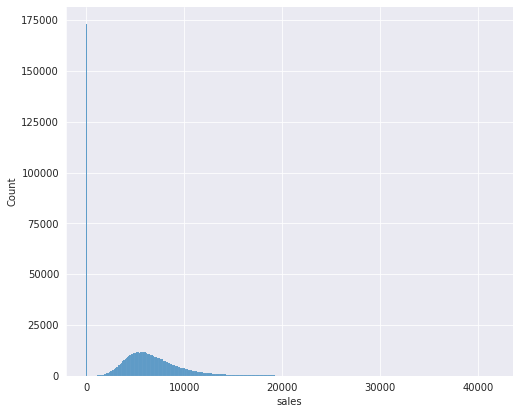

In [21]:
plt.figure(figsize=(15,5))
ax = sns.displot(df2['sales'])
ax.fig.set_size_inches(8,6)

<AxesSubplot:xlabel='assortment', ylabel='sales'>

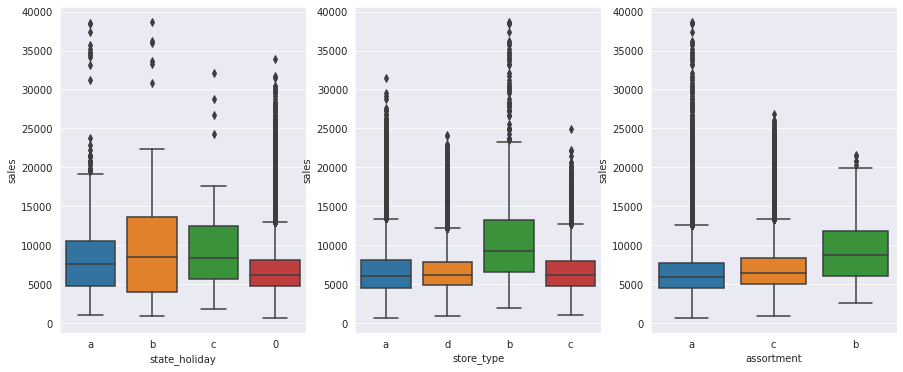

In [22]:
df_temp = df2[(df2['state_holiday'] != '0') & (df2['sales'] >0)]

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=df_temp)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=df_temp)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=df_temp)

In [23]:
df2.to_csv('df2.csv', index=False)

# 3. Feature Engeneering

In [24]:
df3 = df2.copy()

In [25]:
### Mapa mental

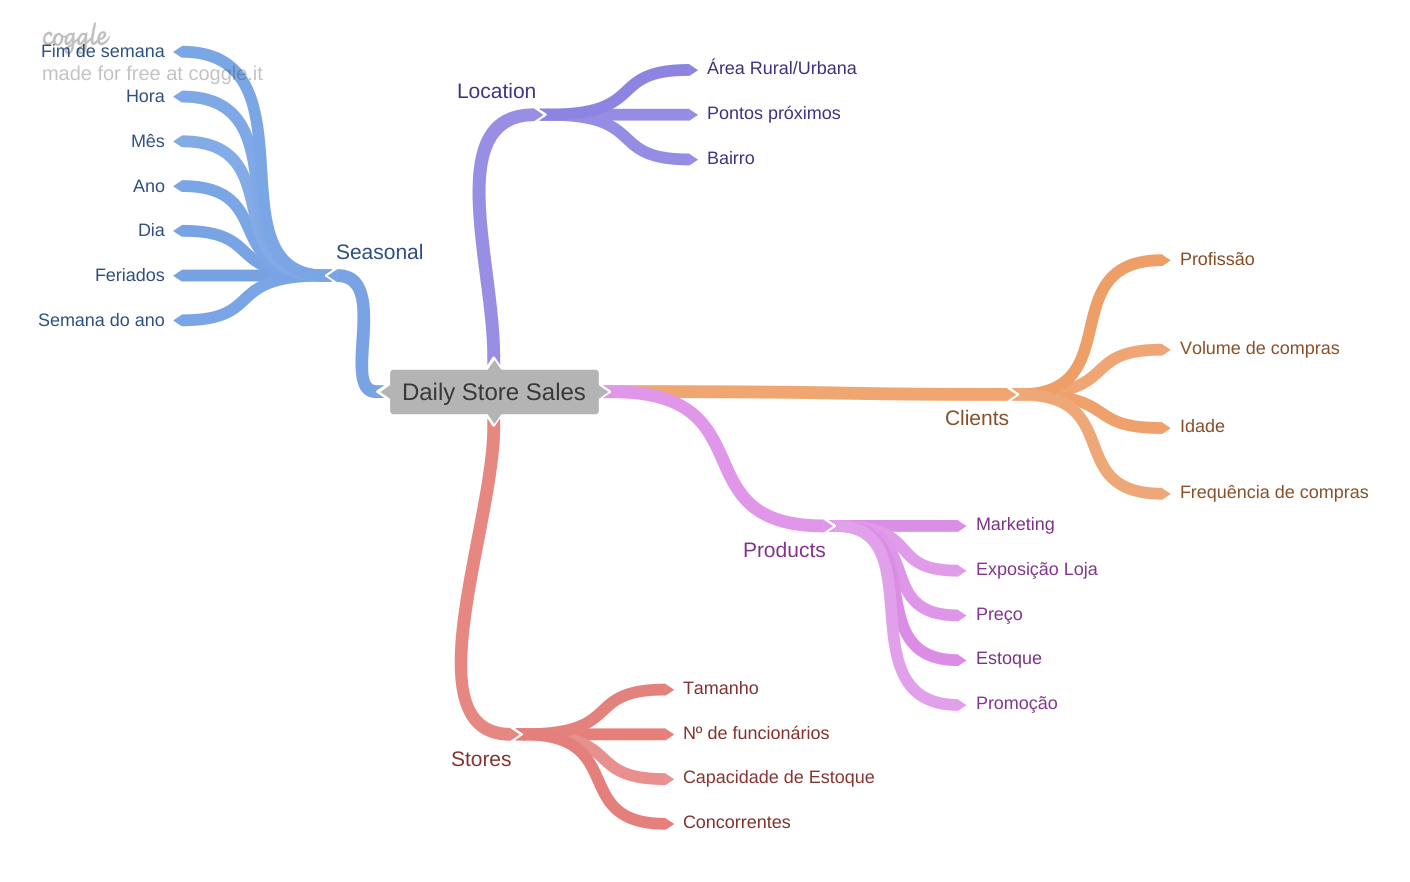

In [26]:
Image('mind_map.png')

In [27]:
### Criação de Hipóteses

In [28]:
#Minhas
#1. Lojas com maior número de sortimento vendem mais.
#2. Lojas com competidores mais proximos vendem menos.
#3. As vendas são maiores nos fins de semana.
#4. Lojas em produção vendem mais.

In [29]:
#Meigarom
#1 Lojas com maior sortimentos vendem mais
#2 Lojas com competidores mais próximos vendem menos
#3 Lojas com competidores a mais tempo vendem mais
#4 Lojas com promoções ativas por mais tempo vendem mais
#5 Lojas com mais dias de promoção vendem mais
#6 Lojas com mais promocoes consecutivas vendem mais
#7 Lojas abertas durante o feriado de natal vendem mais
#8 Lojas vendem mais ao longo dos anos
#9 Lojas devem vender mais no segundo semestre do ano
#10 Lojas devem vender mais depois do dia 10 de cada mês
#11 Lojas devem vender menos aos finais de semana
#12 Lojas devem vender menos durante os feriados escolares

In [30]:
### Criação de variáveis

In [31]:
#year
df3['year'] = df3['date'].dt.year

#month
df3['month'] = df3['date'].dt.month

#day
df3['day'] = df3['date'].dt.day

#week of year
df3['week_of_year'] = df3['date'].dt.isocalendar().week

#year week
df3['year_week'] = df3['date'].dt.strftime('%Y-%W')

#competition since
df3['competition_since'] = df3.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df3['competition_time_month'] = ((df3['date'] - df3['competition_since'])/30).apply(lambda x: x.days).astype(int)
#promo since
df3['promo_since'] = df3['promo2_since_year'].astype(str) + '-' + df3['promo2_since_week'].astype(str)
df3['promo_since'] = df3['promo_since'].apply(lambda x: datetime.datetime.strptime(x+'-1','%Y-%W-%w') - datetime.timedelta(days=7))
df3['promo_time_week'] = ((df3['date'] - df3['promo_since'])/7).apply(lambda x: x.days).astype(int)
#assortment
df3['assortment'] = df3['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')
#state holiday
df3['state_holiday'] = df3['state_holiday'].apply(lambda x: 'public holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')


In [32]:
df3.head(5).T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


In [33]:
df3.to_csv('df3.csv', index=False)

# 4. Filtragem de Variáveis

In [34]:
df4 = df3.copy()

In [35]:
df4.head(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


In [36]:
### Seleção de Linhas
df4 = df4[(df4['open'] != 0) & (df4['sales'] > 0)]
### Seleção de Colunas
df4.drop(['customers','open','promo_interval','calendar'], axis=1, inplace=True)

In [37]:
df4.to_csv('df4.csv', index=False)

# 5. Análise Exploratória de Dados (EDA)

In [38]:
df5 = df4.copy()

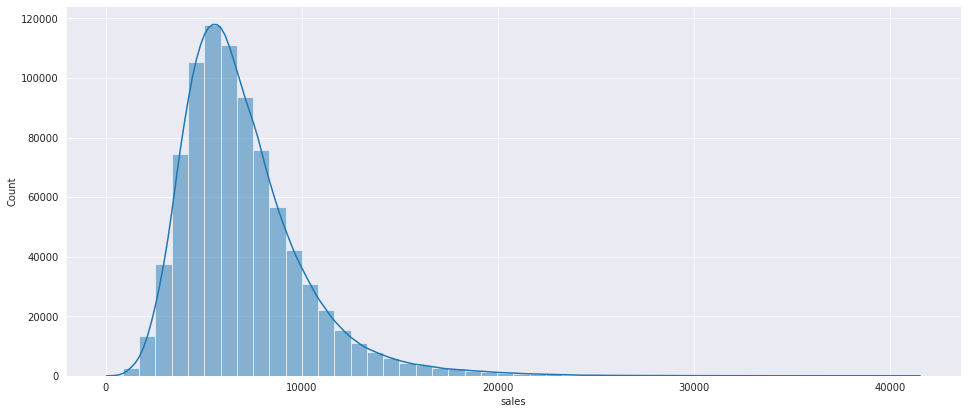

In [39]:
#Análise Univariada
g = sns.displot(df5['sales'], bins=50, kde=True)
g.fig.set_figwidth(16)
g.fig.set_figheight(6)

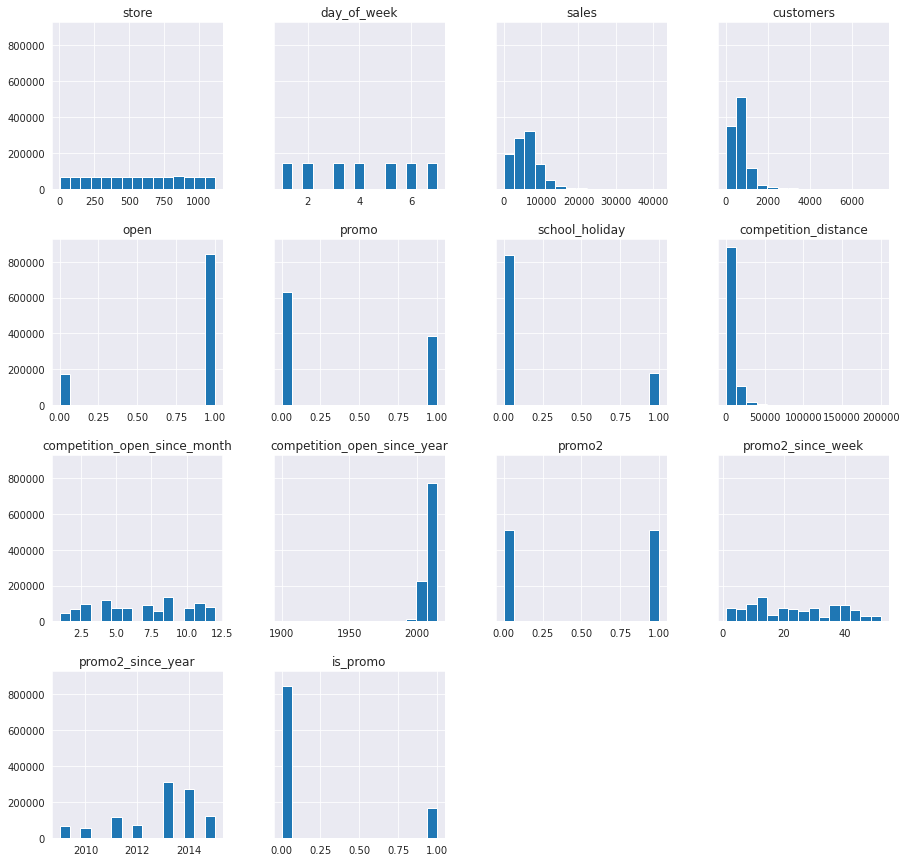

In [40]:
num_features.hist(figsize=(15,15), sharey=True, bins=15);

In [41]:
df5['state_holiday'].drop_duplicates()

0            regular_day
63559     public holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

In [42]:
df5['state_holiday'].value_counts()

regular_day       843428
public holiday       694
easter_holiday       145
christmas             71
Name: state_holiday, dtype: int64

In [43]:
df5['state_holiday']

0             regular_day
1             regular_day
2             regular_day
3             regular_day
4             regular_day
                ...      
1016776    public holiday
1016827    public holiday
1016863    public holiday
1017042    public holiday
1017190    public holiday
Name: state_holiday, Length: 844338, dtype: object

In [44]:
df5['state_holiday'].value_counts()

regular_day       843428
public holiday       694
easter_holiday       145
christmas             71
Name: state_holiday, dtype: int64

<AxesSubplot:xlabel='sales', ylabel='Density'>

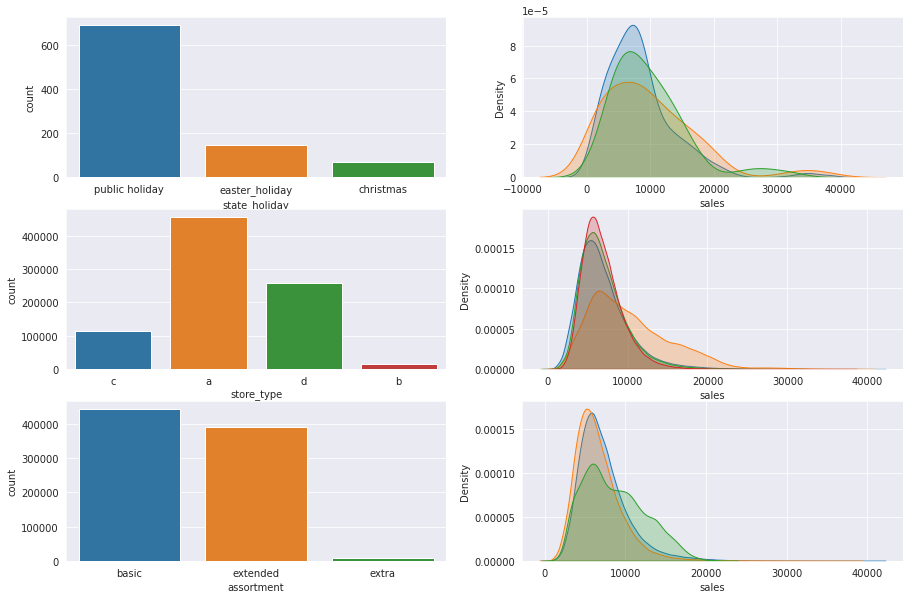

In [45]:
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.countplot(x=df5[df5['state_holiday'] != 'regular_day']['state_holiday'])

plt.subplot(3,2,2)
sns.kdeplot(df5[df5['state_holiday'] == 'public holiday']['sales'], label='public_holiday', shade=True)
sns.kdeplot(df5[df5['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade=True)
sns.kdeplot(df5[df5['state_holiday'] == 'christmas']['sales'], label='christmas', shade=True)

plt.subplot(3,2,3)
sns.countplot(x=df5['store_type'])

plt.subplot(3,2,4)
sns.kdeplot(df5[df5['store_type'] == 'a']['sales'], label='a', shade=True)
sns.kdeplot(df5[df5['store_type'] == 'b']['sales'], label='b', shade=True)
sns.kdeplot(df5[df5['store_type'] == 'c']['sales'], label='c', shade=True)
sns.kdeplot(df5[df5['store_type'] == 'd']['sales'], label='d', shade=True)

plt.subplot(3,2,5)
sns.countplot(x=df5['assortment'])

plt.subplot(3,2,6)
sns.kdeplot(df5[df5['assortment'] == 'extended']['sales'], shade=True)
sns.kdeplot(df5[df5['assortment'] == 'basic']['sales'], shade=True)
sns.kdeplot(df5[df5['assortment'] == 'extra']['sales'], shade=True)

In [46]:
#Análise Bivariada

### Validação de Hipóteses

<AxesSubplot:xlabel='year_week'>

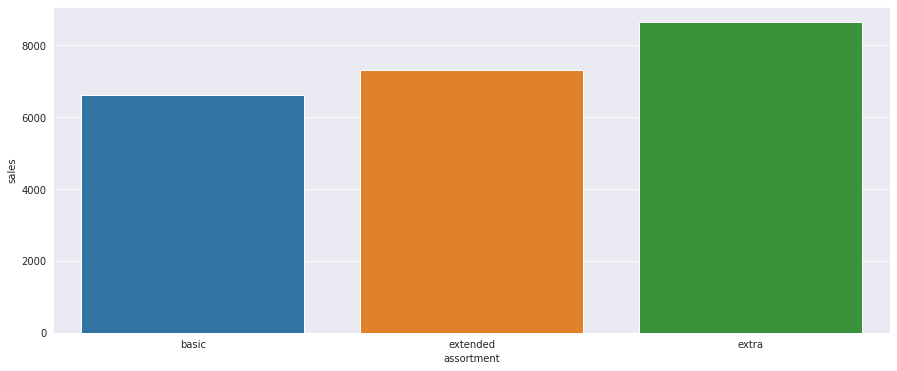

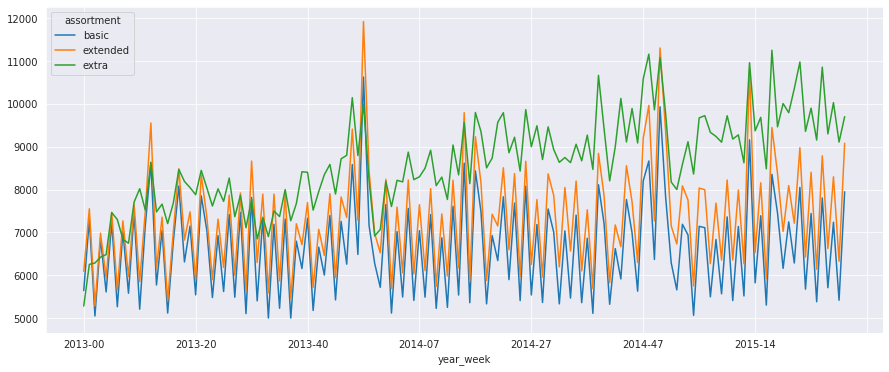

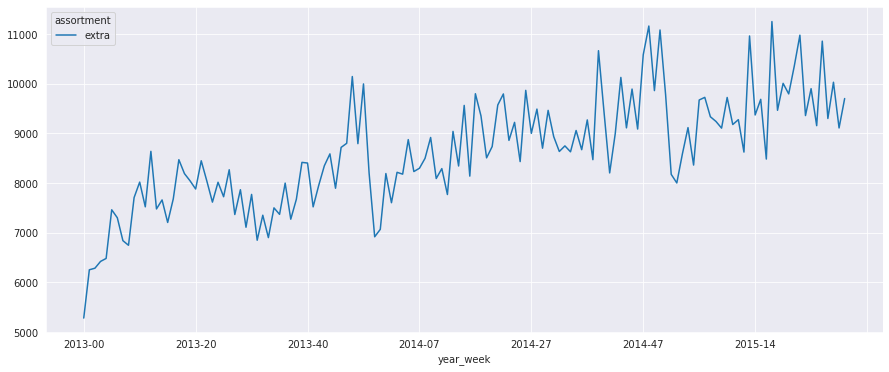

In [47]:
#1 Lojas com maior sortimentos vendem mais
#Falsa, lojas com maior sortimento vendem menos, conforme evidência abaixo:
#>>Verdadeiro, lojas com maior sortimento tendem a ter uma média de venda maior em relação à outras lojas

plt.figure(figsize=(15,6))
df_temp = df5[['assortment','sales']].groupby('assortment').mean().reset_index()
sns.barplot(x='assortment', y='sales', data=df_temp);

df_temp2 = df5[['year_week','assortment','sales']].groupby(['year_week','assortment']).mean().reset_index()
df_temp2.pivot(index='year_week',columns='assortment',values='sales').plot(figsize=(15,6))

df_temp3 = df_temp2[df_temp2['assortment'] == 'extra']
df_temp3.pivot(index='year_week',columns='assortment',values='sales').plot(figsize=(15,6))

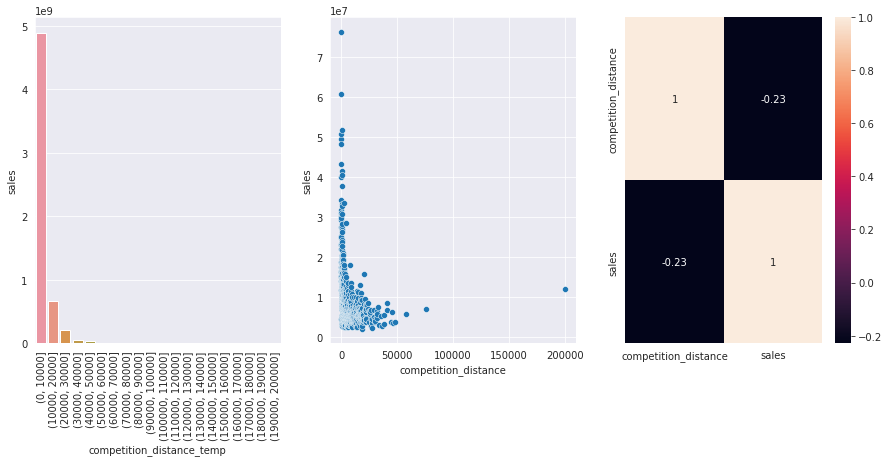

In [48]:
#2 Lojas com competidores mais próximos vendem menos
#Falsa, lojas com competidores mais próximos na verdade vendem mais.

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_temp = df5[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
bins = list(np.arange(0,200001,10000))
df_temp['competition_distance_temp'] = pd.cut(x=df_temp['competition_distance'], bins=bins)
df_temp2 = df_temp[['competition_distance_temp','sales']].groupby('competition_distance_temp').sum().reset_index()
plt.xticks(rotation=90)
sns.barplot(x='competition_distance_temp',y='sales',data=df_temp2)

plt.subplot(1,3,2)
sns.scatterplot(x='competition_distance', y='sales', data=df_temp);

plt.subplot(1,3,3)
sns.heatmap(df_temp.corr(method='pearson'), annot=True);

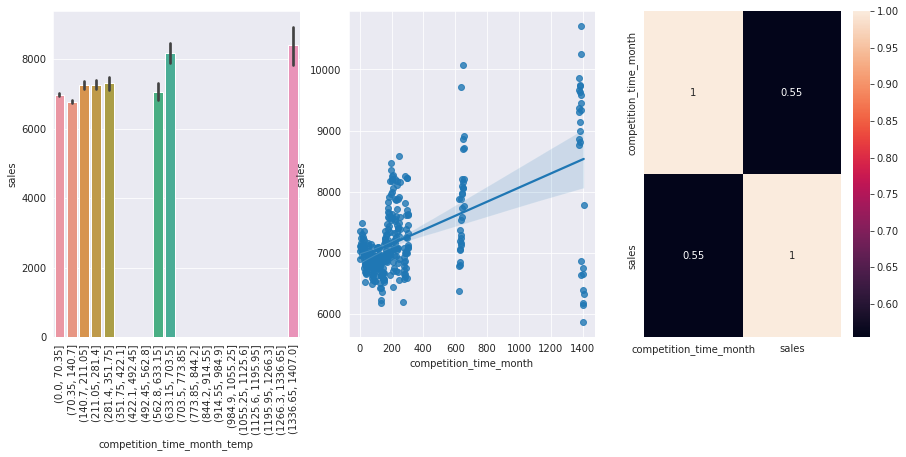

In [49]:
#3 Lojas com competidores há mais tempo vendem mais
#Falsa, lojas com competidores há mais tempo vendem menos
#>>>Verdadeiro, lojas com competidores há mais tempo tendem a vender mais
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_temp = df5[['competition_time_month','sales']].groupby('competition_time_month').mean().reset_index()
bins = np.arange(0,df5['competition_time_month'].max()+1,(df5['competition_time_month'].max())/20)
df_temp['competition_time_month_temp'] = pd.cut(df_temp['competition_time_month'], bins=bins)
sns.barplot(x='competition_time_month_temp', y='sales', data=df_temp);
plt.xticks(rotation=90);

plt.subplot(1,3,2)
df_temp2 = df_temp[df_temp['competition_time_month'] > 0]
sns.regplot(x='competition_time_month', y='sales', data=df_temp2)

plt.subplot(1,3,3)
sns.heatmap(df_temp.corr(method='pearson'), annot=True);

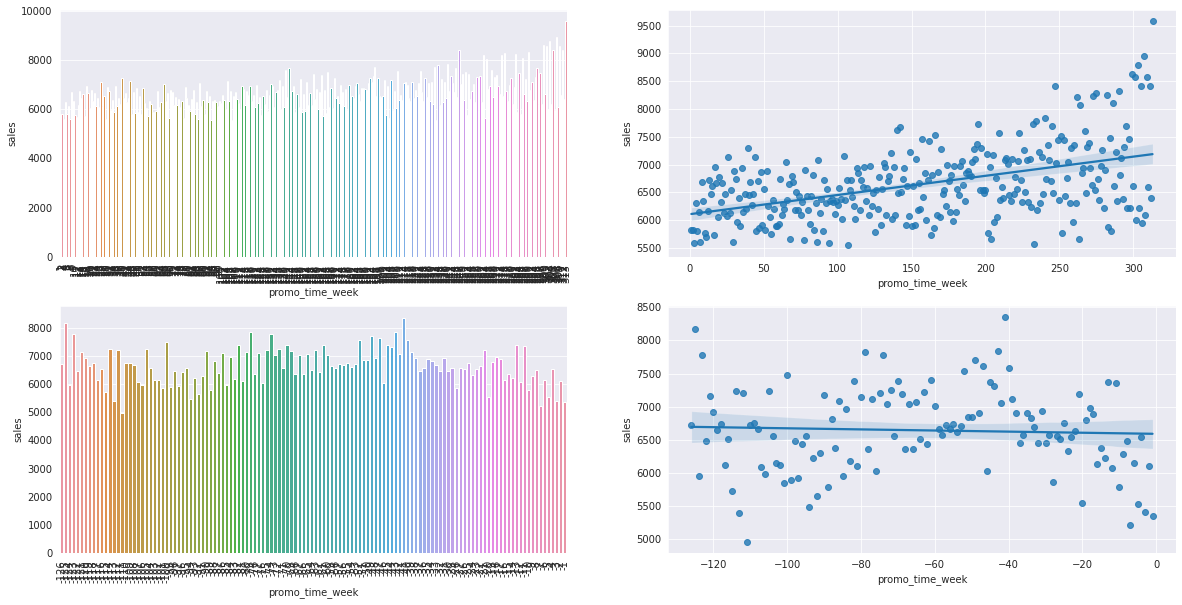

In [50]:
#4 Lojas com promoções ativas por mais tempo vendem mais
#Falsa, lojas com promoções ativas por mais tempo não necessariamente vendem mais
#>>Verdadeiro
df_temp = df5[['promo_time_week','sales']].groupby('promo_time_week').mean().reset_index()
df_temp2 = df_temp[df_temp['promo_time_week'] > 0]
df_temp3 = df_temp[df_temp['promo_time_week'] < 0]

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x='promo_time_week', y='sales', data=df_temp2)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.regplot(x='promo_time_week', y='sales', data=df_temp2)

plt.subplot(2,2,3)
sns.barplot(x='promo_time_week', y='sales', data=df_temp3)
plt.xticks(rotation=90);

plt.subplot(2,2,4)
sns.regplot(x='promo_time_week', y='sales', data=df_temp3)
plt.show()

In [51]:
#<s>5 Lojas com mais dias de promoção vendem mais</s>

<Figure size 1080x432 with 0 Axes>

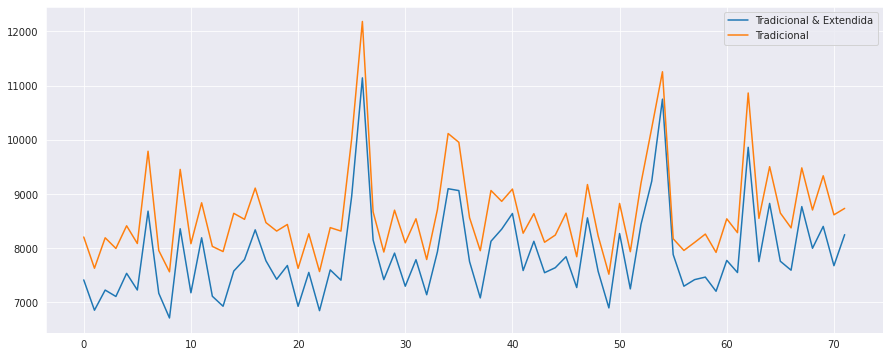

In [52]:
#6 Lojas com mais promocoes consecutivas vendem mais
#Falsa, lojas com promoções consecutivas vendem menos
plt.figure(figsize=(15,6))
df_temp = df5[(df5['promo'] == 1) & (df5['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').mean().reset_index()
ax = df_temp.plot(figsize=(15,6))
df_temp2 = df5[(df5['promo'] == 1) & (df5['promo2'] == 0)][['year_week', 'sales']].groupby('year_week').mean().reset_index()
df_temp2.plot(ax=ax)
plt.legend(['Tradicional & Extendida','Tradicional'])

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

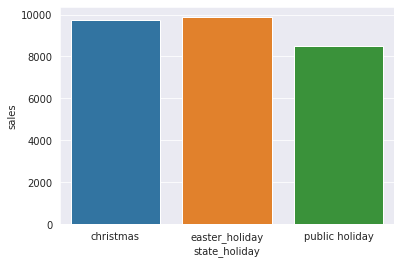

In [53]:
#7 Lojas abertas durante o feriado de natal vendem mais
#Falsa? Acredito que cabe utilizar .mean() ao invés de .sum()
#Falsa, o feriado campeão de venda é o easter_holiday, e não christmas
df_temp = df5[['state_holiday','sales']].groupby('state_holiday').mean().reset_index()
df_temp.drop(3, axis=0, inplace=True)
sns.barplot(x='state_holiday', y='sales', data=df_temp)


<AxesSubplot:>

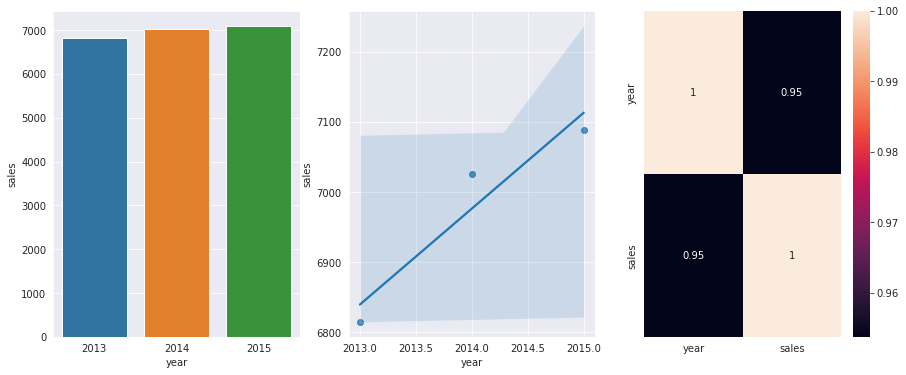

In [54]:
#8 Lojas vendem mais ao longo dos anos
#Falsa? Seria válido utilizar mean, visto que o ano de 2015 não está fechado
#Verdadeiro, o crescimento da loja cresce com o passar dos anos
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_temp = df5[['year','sales']].groupby('year').mean().reset_index()
sns.barplot(x='year', y='sales', data=df_temp)

plt.subplot(1,3,2)
sns.regplot(x='year', y='sales', data=df_temp)

plt.subplot(1,3,3)
sns.heatmap(df_temp.corr(method='pearson'), annot=True)

<AxesSubplot:>

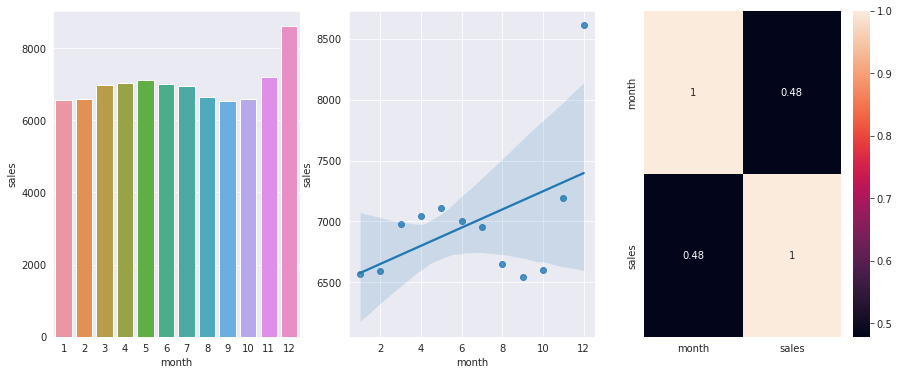

In [55]:
#9 Lojas devem vender mais no segundo semestre do ano
#Falsa? Acredito que pra validação correta seria cabivel utilizar mean também, como as demais.
#>>Verdadeiro, há um crescimento de vendas no segundo semestre do ano.
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_temp = df5[['month','sales']].groupby('month').mean().reset_index()
sns.barplot(x='month', y='sales', data=df_temp)

plt.subplot(1,3,2)
sns.regplot(x='month', y='sales', data=df_temp)

plt.subplot(1,3,3)
sns.heatmap(df_temp.corr(method='pearson'), annot=True)

<AxesSubplot:xlabel='date_period', ylabel='sales'>

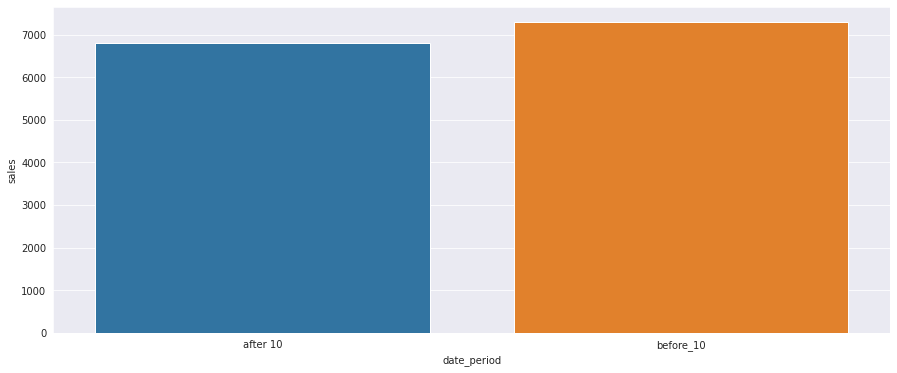

In [56]:
#10 Lojas devem vender mais depois do dia 10 de cada mês
#Falsa
plt.figure(figsize=(15,6))
df5['date_period'] = df5['day'].apply(lambda x: 'before_10' if x <= 10 else 'after 10')
df_temp = df5[['date_period','sales']].groupby('date_period').mean().reset_index()
sns.barplot(x='date_period', y='sales', data=df_temp)

<AxesSubplot:>

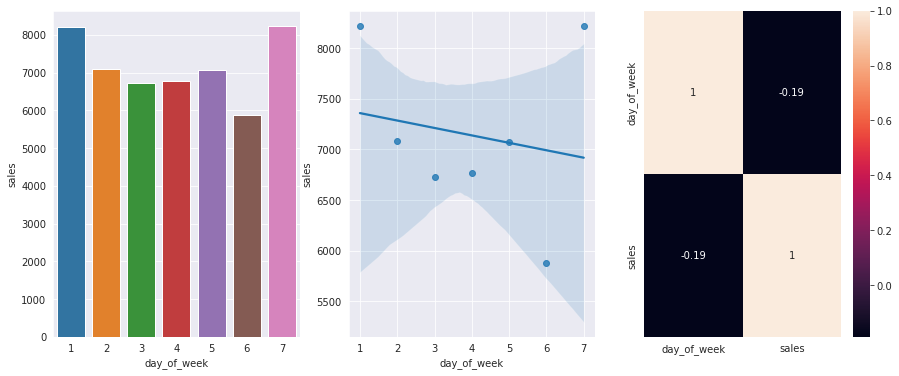

In [57]:
#11 Lojas devem vender menos aos finais de semana
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_temp = df5[['day_of_week','sales']].groupby('day_of_week').mean().reset_index()
sns.barplot(x='day_of_week', y='sales', data=df_temp)

plt.subplot(1,3,2)
sns.regplot(x='day_of_week', y='sales', data=df_temp)

plt.subplot(1,3,3)
sns.heatmap(df_temp.corr(method='pearson'), annot=True)

<AxesSubplot:xlabel='school_holiday', ylabel='sales'>

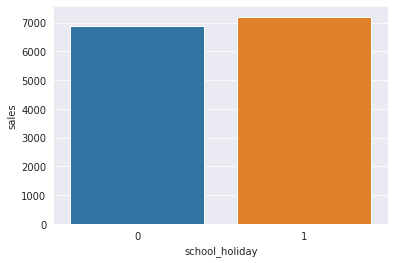

In [58]:
#12 Lojas devem vender menos durante os feriados escolares
#Falso
df_temp = df5[['school_holiday','sales']].groupby('school_holiday').mean().reset_index()
sns.barplot(x='school_holiday', y='sales', data=df_temp)

In [59]:
#Análise Multivariada

In [60]:
#Atributos categóricos
df_temp = df5.select_dtypes(include='object')

In [61]:
#CM = Tabela de contingencia (Confusion Matrix)
def cramer_v(x, y):
    cm = pd.crosstab(x, y).values    
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0,chi2 - (k-1)*(r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    return np.sqrt((chi2corr/n)/(min(kcorr-1,rcorr-1)))

In [62]:
cramer_v(df_temp['state_holiday'], df_temp['store_type'])

0.07106469715258833

In [63]:
df_temp.drop(['year_week'], axis=1, inplace=True)


In [64]:
a1 = cramer_v(df_temp['state_holiday'],df_temp['state_holiday'])
a2 = cramer_v(df_temp['state_holiday'],df_temp['store_type'])
a3 = cramer_v(df_temp['state_holiday'],df_temp['assortment'])

a4 = cramer_v(df_temp['store_type'],df_temp['state_holiday'])
a5 = cramer_v(df_temp['store_type'],df_temp['store_type'])
a6 = cramer_v(df_temp['store_type'],df_temp['assortment'])

a7 = cramer_v(df_temp['assortment'],df_temp['state_holiday'])
a8 = cramer_v(df_temp['assortment'],df_temp['store_type'])
a9 = cramer_v(df_temp['assortment'],df_temp['assortment'])

df_temp = pd.DataFrame({'state_holiday':[a1,a2,a3],
              'store_type':[a4,a5,a6],
              'assortment':[a7,a8,a9]
             })
df_temp.set_index(df_temp.columns)

,state_holiday,store_type,assortment
state_holiday,1.000002,0.071065,0.067546
store_type,0.071065,1.000002,0.538457
assortment,0.067546,0.538457,1.000001


In [65]:
df_temp

,state_holiday,store_type,assortment
0,1.000002,0.071065,0.067546
1,0.071065,1.000002,0.538457
2,0.067546,0.538457,1.000001


In [66]:
df5.to_csv('df5.csv', index=False)

# 6. Preparação dos dados

In [67]:
df6 = df5.copy()

### Normalização

### Reescala

In [68]:
rs = RobustScaler()
mms = MinMaxScaler()
#competition distance
df6['competition_distance'] = rs.fit_transform(df6[['competition_distance']].values)
#year
df6['year'] = mms.fit_transform(df6[['year']].values)
#competition time month
df6['competition_time_month'] = rs.fit_transform(df6[['competition_time_month']].values)
#promo time week
df6['promo_time_week'] = mms.fit_transform(df6[['promo_time_week']].values)

<AxesSubplot:>

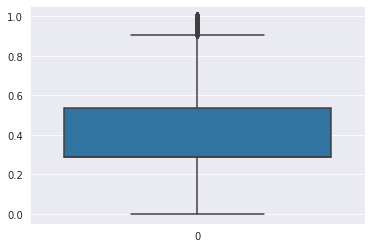

In [69]:
sns.boxplot(data=df6['promo_time_week'])

<AxesSubplot:xlabel='competition_distance', ylabel='Count'>

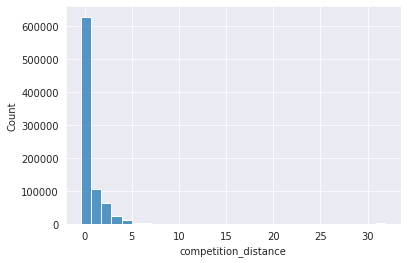

In [70]:
sns.histplot(data=df6['competition_distance'], bins=30)

### Transformação

#### Encoding

In [71]:
df6.head(5)

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,date_period
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,-0.170968,...,1.0,7,31,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,after 10
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,-0.283871,...,1.0,7,31,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551,after 10
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,1.903226,...,1.0,7,31,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822,after 10
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,-0.275806,...,1.0,7,31,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016,after 10
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,4.448387,...,1.0,7,31,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016,after 10


In [72]:
#state_holiday (Utilizado One Hot Encoding)
df6 = pd.get_dummies(df6,prefix=['state_holiday'], columns=['state_holiday'])

In [73]:
#store_type
le = LabelEncoder()
df6['store_type'] = le.fit_transform(df6['store_type'])

In [74]:
#assortment
assortment_dict = {'basic':1, 'extra':2, 'extended':3}
df6['assortment'] = df6['assortment'].map(assortment_dict)

In [75]:
df6.head(5)

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,...,year_week,competition_since,competition_time_month,promo_since,promo_time_week,date_period,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public holiday,state_holiday_regular_day
0,1,5,2015-07-31,5263,1,1,2,1,-0.170968,9,...,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,after 10,0,0,0,1
1,2,5,2015-07-31,6064,1,1,0,1,-0.283871,11,...,2015-30,2007-11-01,1.054054,2010-03-22,0.922551,after 10,0,0,0,1
2,3,5,2015-07-31,8314,1,1,0,1,1.903226,12,...,2015-30,2006-12-01,1.202703,2011-03-28,0.801822,after 10,0,0,0,1
3,4,5,2015-07-31,13995,1,1,2,3,-0.275806,9,...,2015-30,2009-09-01,0.743243,2015-07-27,0.287016,after 10,0,0,0,1
4,5,5,2015-07-31,4822,1,1,0,1,4.448387,4,...,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016,after 10,0,0,0,1


#### Response variable transformation

In [76]:
df6['sales'].head(5)

0     5263
1     6064
2     8314
3    13995
4     4822
Name: sales, dtype: int64

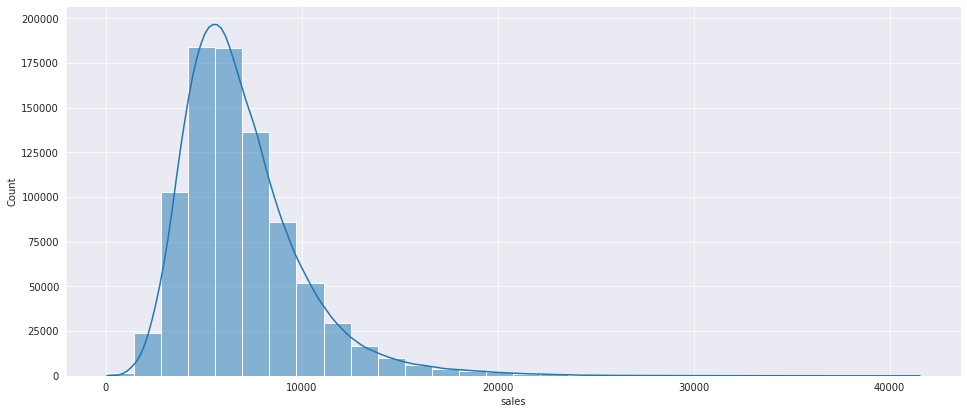

In [77]:
g1 = sns.displot(df6['sales'], bins=30, kde=True)
g1.fig.set_figwidth(16)
g1.fig.set_figheight(6)

In [78]:
df6['sales'] = np.log1p(df6['sales'])

In [79]:
df6['sales'].head(5)

0    8.568646
1    8.710290
2    9.025816
3    9.546527
4    8.481151
Name: sales, dtype: float64

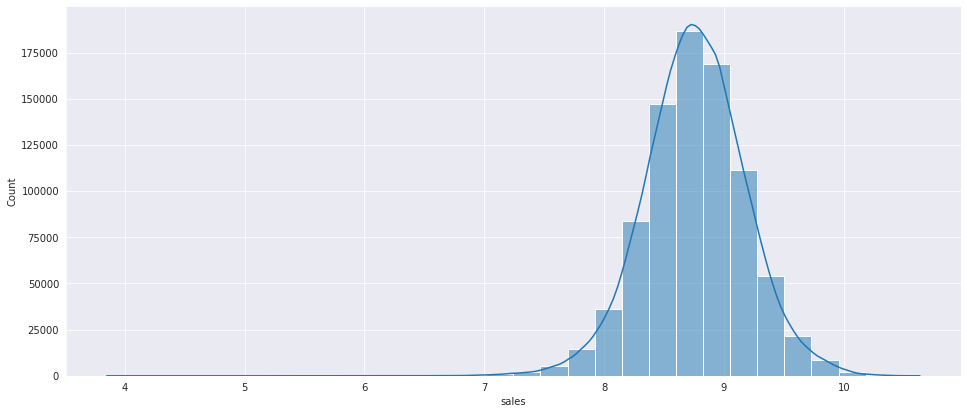

In [80]:
g1 = sns.displot(df6['sales'], bins=30, kde=True)
g1.fig.set_figwidth(16)
g1.fig.set_figheight(6)

####  Nature Transformation

In [81]:
#day_of_week
df6['day_of_week_sin'] = df6['day_of_week'].apply(lambda x: np.sin(x*(2.*np.pi/7)))
df6['day_of_week_cos'] = df6['day_of_week'].apply(lambda x: np.cos(x*(2.*np.pi/7)))
#month
df6['month_sin'] = df6['month'].apply(lambda x: np.sin(x*(2.*np.pi/12)))
df6['month_cos'] = df6['month'].apply(lambda x: np.cos(x*(2.*np.pi/12)))
#day
df6['day_sin'] = df6['day'].apply(lambda x: np.sin(x*(2.*np.pi/30)))
df6['day_cos'] = df6['day'].apply(lambda x: np.cos(x*(2.*np.pi/30)))
#week_of_year
df6['week_of_year_sin'] = df6['week_of_year'].apply(lambda x: np.sin(x*(2.*np.pi/52)))
df6['week_of_year_cos'] = df6['week_of_year'].apply(lambda x: np.cos(x*(2.*np.pi/52)))

In [82]:
df6.to_csv('df6.csv', index=False)

# 7. Seleção de Features

In [83]:
df7 = df6.copy()

### Divisão do dataframe de teste e de treino

In [84]:
cols_drop = ['day_of_week','month','week_of_year','day','promo_since','competition_since','year_week','date_period']
df7 = df7.drop(cols_drop, axis=1)

In [85]:
df7[['store','date']].groupby('store').max().reset_index()['date'][0] - datetime.timedelta(days=6*7)

Timestamp('2015-06-19 00:00:00')

In [86]:
X_train = df7[df7['date'] < '2015-06-19']
y_train = X_train['sales']

X_test = df7[df7['date'] >= '2015-06-19']
y_test = X_test['sales']

print('Training min date: {}'.format(X_train['date'].min()))
print('Training max date: {}'.format(X_train['date'].max()))

print('\nTraining min date: {}'.format(X_test['date'].min()))
print('Training max date: {}'.format(X_test['date'].max()))

Training min date: 2013-01-01 00:00:00
Training max date: 2015-06-18 00:00:00

Training min date: 2015-06-19 00:00:00
Training max date: 2015-07-31 00:00:00


### Boruta Feature Selector

In [88]:
pip install boruta

  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.


In [89]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

In [90]:
X_train.dtypes

store                                    int64
date                            datetime64[ns]
sales                                  float64
promo                                    int64
school_holiday                           int64
store_type                               int64
assortment                               int64
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
is_promo                                 int64
year                                   float64
competition_time_month                 float64
promo_time_week                        float64
state_holiday_christmas                  uint8
state_holiday_easter_holiday             uint8
state_holiday_public holiday             uint8
state_holiday_regular_day                uint8
day_of_week_s

In [91]:
#Traning e Test dataset for Boruta
X_train_n = X_train.drop(['date','sales'],axis=1).values
y_train_n = y_train.values.ravel()

In [92]:
#cols_selected = boruta.support_.tolist()
#
##Definições RandomForestRegressor
#rf = RandomForestRegressor(n_jobs=-1)
#
##Definições Boruta
#boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42).fit(X_train_n, y_train_n)
#
##melhores features
#X_train_fs = X_train.drop(['date','sales'], axis=1)
#cols_selected_boruta = X_train_fs.iloc[:, cols_selected].columns.to_list()
#
##not selected
#cols_not_selected_boruta = list(np.setdiff1d(X_train_fs.columns, cols_selected_boruta))

### Feature Selecting

In [93]:
cols_selected_boruta = [
    'store',
    'promo',
    'store_type',
    'assortment',
    'competition_distance',
    'competition_open_since_month',
    'competition_open_since_year',
    'promo2',
    'promo2_since_week',
    'promo2_since_year',
    'competition_time_month',
    'promo_time_week',
    'day_of_week_sin',
    'day_of_week_cos',
    'month_sin',
    'month_cos',
    'day_sin',
    'day_cos',
    'week_of_year_cos',
    'week_of_year_sin']

#columns to add
feat_to_add = ['date','sales']

cols_selected_boruta.extend(feat_to_add)

In [94]:
df7.to_csv('df7.csv', index=False)